## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 11
---------------------------------------

GOALS:

1. Understand Causal vs Experimental Studies
2. Do a more free form data analysis
3. Start doing your ethics reading

----------------------------------------------------------

This homework has **2 questions**, **10 exercises** and **1 essay response**.

In [363]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [365]:
file_name = 'data/yougov-climate.csv'
DF = pd.read_csv(file_name,index_col=0)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know
country,,,,,
GB,833,604,49,33,114
US,507,493,120,80,133


In the lecture we analyzed the following questions for the first column in the data:

### First question:

What percent of **all respondents** think the climate is changing and human activity is mainly responsible?  

### Second question:

What percent of **GB respondents** think the climate is changing and  human activity is mainly responsible?  

### Third Question

What percent of **US respondents** think the climate is changing and  human activity is mainly responsible?  

**Q1** Repeat the analysis from the lecture notes for one of the other columns/questions.

1. Percent total
2. Percent from GB
3. Percent from US

Talk about the conditional probability in this case:

eg. In a person is from ________ then there is a ________ probability that they believe _______. If a person answered _______ then they are more likley to be from ________. 

First Question:

    45.18%

Second Question: 

    51.01%

Third Question:

    If a person is from the United States, then there is a 3% probability that they believe the climate is changing but human activity is not responsible at all.  If a person answers that the climate is changing and human activity is partly responsible, together with other factors, then they are more likely to be from Great Britain, however only extremely marginally (0.003% difference).

In [369]:
DF.loc['total']= DF.sum(axis=0)
DF['total'] = DF.sum(axis=1)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know,total
country,,,,,,
GB,833,604,49,33,114,1633
US,507,493,120,80,133,1333
total,1340,1097,169,113,247,2966


## Berkeley admission data example

- Study carried out by the Graduate Division of the University of California, Berkeley in the early 70’s to evaluate whether there was a gender bias in graduate admissions.
- The data come from six departments. For confidentiality we'll call them A-F. 
- We have information on whether the applicant was male or female and whether they were admitted or rejected. This is an old study so only two binary classifications were used. 

### Here is the data


In [372]:
file_name = 'data/berkley.csv'
DF = pd.read_csv(file_name)
show(DF)

In [374]:
DF_melt = pd.melt(DF,id_vars=['Department'],var_name='MF',value_name='Number')
DF_melt

,Department,MF,Number
0,A,Male Yes,512
1,B,Male Yes,353
2,C,Male Yes,120
3,D,Male Yes,138
4,E,Male Yes,53
5,F,Male Yes,22
6,A,Male No,313
7,B,Male No,207
8,C,Male No,205
9,D,Male No,279


In [376]:
DF_melt['gender'] = DF_melt['MF'].apply(lambda x: x.split(' ')[0]).copy()
DF_melt['admitted'] = DF_melt['MF'].apply(lambda x: x.split(' ')[1]).copy()

In [378]:
DF_melt

,Department,MF,Number,gender,admitted
0,A,Male Yes,512,Male,Yes
1,B,Male Yes,353,Male,Yes
2,C,Male Yes,120,Male,Yes
3,D,Male Yes,138,Male,Yes
4,E,Male Yes,53,Male,Yes
5,F,Male Yes,22,Male,Yes
6,A,Male No,313,Male,No
7,B,Male No,207,Male,No
8,C,Male No,205,Male,No
9,D,Male No,279,Male,No


### Gender distribution by department

What can we say about the gender distribution if we look at the individual departments.

Start with our original "melted" data frame:

#### Lets pivot!

Pivot this data so that our departments become the column labels and our MF column becomes the index.

In [382]:
# Your code here

DF_dept = DF_melt.pivot(index='MF',columns='Department',values='Number')
DF_dept

Department,A,B,C,D,E,F
MF,,,,,,
Female No,19,8,391,244,299,317
Female Yes,89,17,202,131,94,24
Male No,313,207,205,279,138,351
Male Yes,512,353,120,138,53,22


**Q2** Calculate the proportions for the other departments. We did department A in the lecture. You can use the code from the lecture or come up with your own way to do this. You can do this one by one or try using a FOR loop.

Talk about what you see in these proportions. Which departments admit a large number of women? How do your number align with the visualization below?

    Department A admits the largest number of women compared to the other departments, also admitting the largest amount of people total.  The probabilities also seem to match the graphs, as the probabilities overall decrease as the departments progress.

In [385]:
# Your code here

prob_female = DF_dept['B']['Female Yes']/(DF_dept['B']['Female Yes']+DF_dept['B']['Female No'])
prob_male = DF_dept['B']['Male Yes']/(DF_dept['B']['Male Yes']+DF_dept['B']['Male No'])

In [387]:
prob_female = DF_dept['C']['Female Yes']/(DF_dept['C']['Female Yes']+DF_dept['C']['Female No'])
prob_male = DF_dept['C']['Male Yes']/(DF_dept['C']['Male Yes']+DF_dept['C']['Male No'])

In [389]:
prob_female = DF_dept['D']['Female Yes']/(DF_dept['D']['Female Yes']+DF_dept['D']['Female No'])
prob_male = DF_dept['D']['Male Yes']/(DF_dept['D']['Male Yes']+DF_dept['D']['Male No'])

In [391]:
prob_female = DF_dept['E']['Female Yes']/(DF_dept['E']['Female Yes']+DF_dept['E']['Female No'])
prob_male = DF_dept['E']['Male Yes']/(DF_dept['E']['Male Yes']+DF_dept['E']['Male No'])

In [393]:
prob_female = DF_dept['F']['Female Yes']/(DF_dept['F']['Female Yes']+DF_dept['F']['Female No'])
prob_male = DF_dept['F']['Male Yes']/(DF_dept['F']['Male Yes']+DF_dept['F']['Male No'])

In [395]:
prob_female

0.07038123167155426

In [397]:
prob_male

0.058981233243967826

### Here is a plot of the proportions data

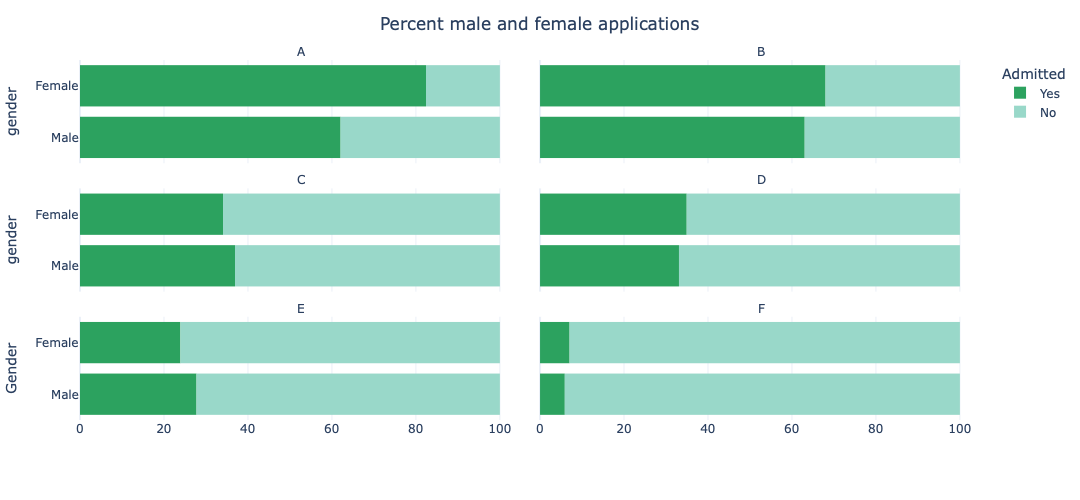

In [400]:
fig = px.histogram(DF_melt,
                   y='gender',
                   x='Number',
                   barnorm = "percent",
                   color='admitted',
                   facet_col='Department',
                   facet_col_wrap=2,
                   color_discrete_map = {'No':'#99d8c9','Yes':'#2ca25f'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(title_text='')

fig.update_layout(title='Percent male and female applications',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

------------------------
------------------------

## Homework - Exercises

** Homework content and data from Data Science in a Box - he-05-legos.Rmd

This week we'll do some data gymnastics to refresh and review what we learned over the past few weeks using (**simulated**) data from Lego sales in 2018 for a sample of customers who bought Legos in the US. This is different than the data we used on the Exam!


### Data

In [403]:
file_name = 'data/lego-sales.csv'
DF = pd.read_csv(file_name)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


### Exercises

* Answer the following questions using reproducible Python code.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

-------------

1.  Describe what you see in the data set (variables, observations, etc)

        There are 620 observations and 14 variables.

2.  What are the three most common first names of purchasers?

        The three most common first names are Jackson, Joseph, and Jacob.

3.  What are the three most common themes of Lego sets purchased?

        The three most common themes are Star Wars, Nexo Knights, and Gear.

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

        The most common subtheme is The Force Awakens.

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

        Done Below

6.  Which age group has purchased the highest number of Lego sets.

        The age group 36-50 has purchased the most amount of sets.

7.  Which age group has spent the most money on Legos?

        The age group 36-50 has also spend the most money on Legos.

8.  Which Lego theme has made the most money for Lego? HINT: Simpler than #5, just use a groupby()

        The Star Wars Lego theme has made the most money for Lego.

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

        There is a 4 way tie with area codes 281, 567, 441, and 712, all with 9 purchases.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

        yo
     

In [406]:
DF.shape

(620, 14)

In [408]:
DF['first_name'].value_counts()

first_name
Jackson       13
Joseph        11
Jacob         11
Michael       10
Kaitlyn        8
              ..
Gunnar         1
David          1
Lawrence       1
John'Dunae     1
Kimberly       1
Name: count, Length: 211, dtype: int64

In [410]:
DF['theme'].value_counts()

theme
Star Wars                  75
Nexo Knights               64
Gear                       55
Mixels                     55
City                       45
Friends                    42
Ninjago                    38
Duplo                      35
Bionicle                   34
Creator                    25
DC Comics Super Heroes     22
Elves                      22
Marvel Super Heroes        19
Dimensions                 18
Disney Princess            15
The Angry Birds Movie      11
Technic                    10
Architecture               10
Minecraft                   9
Advanced Models             4
Ghostbusters                3
Seasonal                    3
Collectable Minifigures     3
Ideas                       2
Classic                     1
Name: count, dtype: int64

In [412]:
mask = DF['theme'] == 'Star Wars'
DFmask = DF[mask]
DFmask['subtheme'].value_counts()

subtheme
The Force Awakens            15
Buildable Figures            11
Episode V                    10
MicroFighters                10
Battlefront                   7
Original Content              7
Episode III                   6
Rebels                        3
Seasonal                      3
Episode IV                    2
Ultimate Collector Series     1
Name: count, dtype: int64

In [414]:
mask1 = DF['age'] <= 18
agegroup1 = DF[mask1]
mask2 = (DF['age'] >= 19) & (DF['age'] <= 25)
agegroup2 = DF[mask2]
mask3 = (DF['age'] >= 26) & (DF['age'] <= 35)
agegroup3 = DF[mask3]
mask4 = (DF['age'] >= 36) & (DF['age'] <= 50)
agegroup4 = DF[mask4]
mask5 = DF['age'] >= 51
agegroup5 = DF[mask5]

In [416]:
agegroup4.shape

(216, 14)

In [418]:
agegroup5['us_price'].sum()

1832.38

In [420]:
DF.groupby(by=['theme'])['us_price'].sum()

theme
Advanced Models             679.96
Architecture                389.90
Bionicle                    549.66
City                       1476.55
Classic                      29.99
Collectable Minifigures      11.97
Creator                     409.75
DC Comics Super Heroes      450.78
Dimensions                  369.82
Disney Princess             167.85
Duplo                       854.65
Elves                       809.78
Friends                     924.58
Gear                       1056.45
Ghostbusters                469.97
Ideas                       139.98
Marvel Super Heroes         539.81
Minecraft                  1439.91
Mixels                      274.45
Nexo Knights               1569.36
Ninjago                    1649.62
Seasonal                     29.97
Star Wars                  2842.25
Technic                     492.90
The Angry Birds Movie       375.89
Name: us_price, dtype: float64

In [454]:
DF['phone_number'] = DF['phone_number'].apply(lambda x: str(x).replace('-',''))
DF['phone_number'] = DF['phone_number'].apply(lambda x: str(x).replace('nan','0'))
DF['phone_number'] = DF['phone_number'].astype(int)
DF['area_code'] = DF['phone_number']/10000000
DF['area_code'] = DF['area_code'].astype(int)
mask = DF['area_code'] != 0
DF_new = DF[mask]
DF_new['area_code'].value_counts()

area_code
281    9
567    9
441    9
712    9
316    8
      ..
760    1
563    1
917    1
947    1
402    1
Name: count, Length: 156, dtype: int64

## Essay Response

Give a brief report on what you are reading and what you have learned so far. If you chose your own articles please insert a link to the articles. If you chose a book, please give the book title and author.

1. What drew you to the book/articles
2. What have you learned so far.

eg. In the first chapter of the book the author talks about..... or My first article discusses..... or I disagree with what the author is saying so far.... or I really like what I am learning about because....

1. I have been mostly looking at articles, a mix of different google searches along with some searching on the articles you attached on the website.

2. The main takeaway I would have would be that, despite some government restrictions, it is mainly up to the data collectors on what they decide to do with your online data, either choosing to protect it or exploit it.  An example of this would be the contrast between Apple and Facebook, where Apple has made many attempts to improve user privacy and protect data harvesting.  On the other hand, Facebook was found in the Facebook-Cambridge analytica scandal to have been harvesting user data without permission in order to influence political outcomes.  Simply just from surface level research, I have found that data privacy is an extremely serious topic, one that can be slightly unnerving knowing that some data that may not even be known to me could be taken and used against me or others without my knowing.